<a href="https://colab.research.google.com/github/soulqan/Machine_Learning_2025/blob/main/JS06_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [6]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551811 sha256=ce1c3ac59e84fd028665f83ac788b6bd5c392134507183348c8b62c055809af4
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 9.9893 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1469 ms


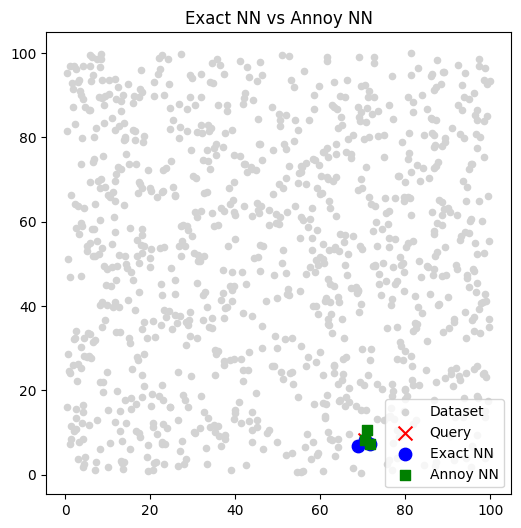

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5448 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1988 ms


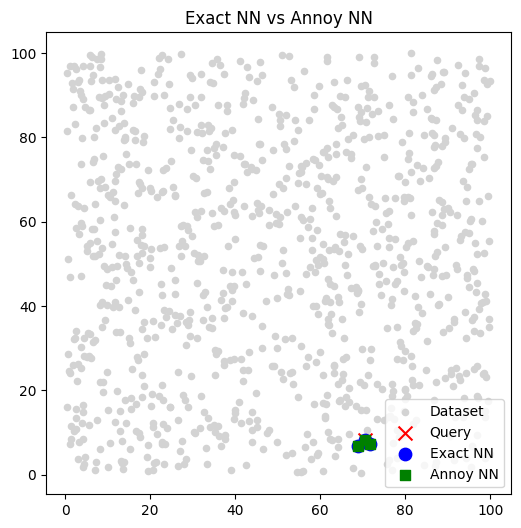

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 11.0493 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.2196 ms


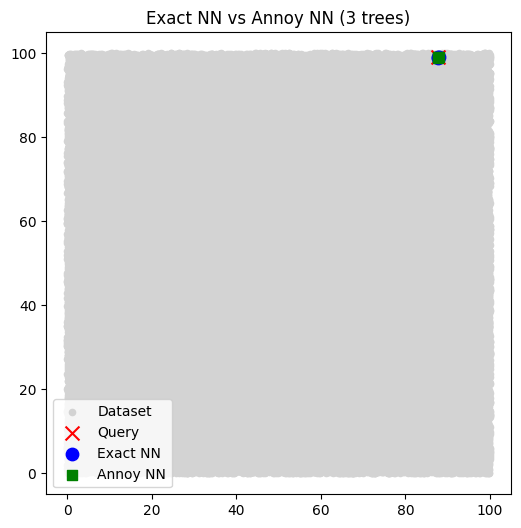

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 3, Jumlah data = 100.000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5188 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1719 ms


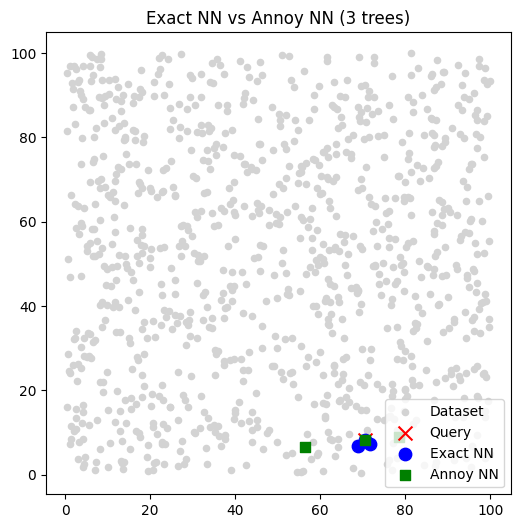

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 1.008 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1473 ms


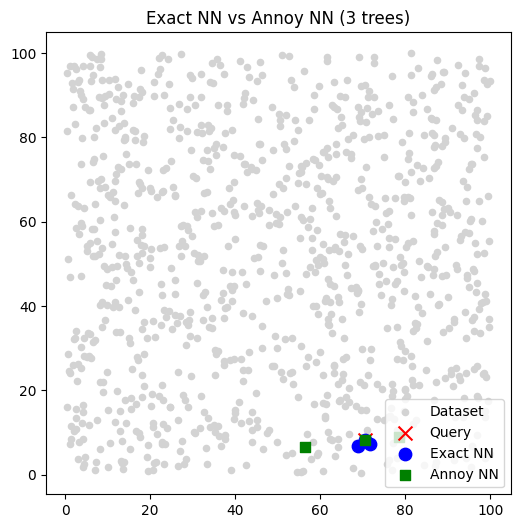

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 8.4476 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1743 ms


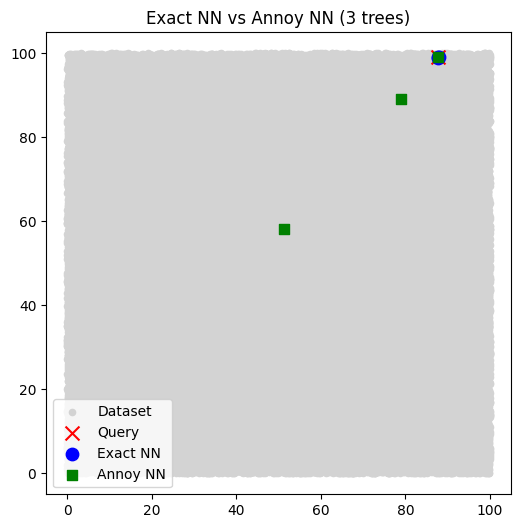

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 100000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

| No | Distance Metrics | Tree | Jumlah Data | Exact NN Index        | Exact NN Jarak                | Waktu Exact (ms) | Annoy NN Index        | Annoy NN Jarak                                | Waktu Annoy (ms) |
| -- | ---------------- | ---- | ----------- | --------------------- | ----------------------------- | ---------------- | --------------------- | --------------------------------------------- | ---------------- |
| 1  | Euclidean        | 3    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 9.9893           | [219, 898, 770]       | [0.0, 1.369159376273702, 2.568167959732514]   | 0.1469           |
| 2  | Euclidean        | 8    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 0.5448           | [219, 898, 593]       | [0.0, 1.369159376273702, 2.2793154441691197]  | 0.1988           |
| 3  | Euclidean        | 3    | 100,000     | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 11.0493          | [64040, 64186, 88792] | [0.0, 0.1579786703429142, 0.2533271079062769] | 0.2196           |
| 4  | Angular          | 3    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 0.5188           | [219, 429, 540]       | [0.0, 14.226342949460172, 8.050748999274271]  | 0.1719           |
| 5  | Angular          | 8    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 1.008            | [219, 429, 540]       | [0.0, 14.226342949460172, 8.050748999274271]  | 0.1473           |
| 6  | Angular          | 3    | 100,000     | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 8.4476           | [64040, 1310, 9720]   | [0.0, 13.237907813420613, 54.73661775436655]  | 0.1743           |


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [39253267 17901692 34062607 19464615 38733274]
Exact NN time: 17.114 seconds


**Saya kurangi Pengambilan data nya karena sangat besar, jadi saya ambil 10 jt dengan dataset track yang diambil secara acak**

In [1]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# Jumlah data dan fitur
n_tracks = 10_000_000   # 10 juta track
n_features = 20        # contoh fitur: danceability, energy, tempo, dll.

# Dataset acak untuk simulasi vektor fitur lagu
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# Vektor query (misal lagu baru yang ingin dicari kemiripannya)
query = np.random.rand(1, n_features).astype(np.float32)

print(f"Dataset siap: {X.shape[0]:,} data dengan {X.shape[1]} fitur.")

# Gunakan jarak Euclidean untuk menghitung semua jarak langsung
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung jarak ke semua data
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = (time.time() - start) * 1000      # konversi ke milidetik

print("\n=== Exact NN ===")
print("Index terdekat :", exact_idx)
print("Jarak terdekat :", distances[exact_idx])
print(f"Waktu komputasi: {exact_time:.3f} ms")

# Inisialisasi Annoy index dengan metric Euclidean
f = n_features
n_trees = 3   # jumlah tree, makin banyak makin akurat tapi lebih lama build

annoy_index = AnnoyIndex(f, 'euclidean')

# Tambahkan item ke index (gunakan loop besar tapi efisien)
print("\nMembangun index Annoy...")
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

# Bangun struktur pohon (index)
build_start = time.time()
annoy_index.build(n_trees)
build_time = (time.time() - build_start) * 1000

# Query ke index (ambil 5 lagu terdekat)
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = (time.time() - start) * 1000

print("\n=== Annoy (Approx NN) ===")
print("Index terdekat :", annoy_idx)
print("Waktu build index:", f"{build_time:.3f} ms")
print("Waktu query:", f"{annoy_time:.3f} ms")

print("\n=== Perbandingan Waktu ===")
print(f"- Exact NN (Brute Force): {exact_time:.3f} ms")
print(f"- Annoy (Approx NN): {annoy_time:.3f} ms (build index: {build_time:.3f} ms)")


Dataset siap: 10,000,000 data dengan 20 fitur.

=== Exact NN ===
Index terdekat : [2906855 7850705 9466600 4726143 4095053]
Jarak terdekat : [0.63580906 0.64468515 0.647164   0.64952475 0.6617256 ]
Waktu komputasi: 2292.292 ms

Membangun index Annoy...

=== Annoy (Approx NN) ===
Index terdekat : [8666528, 3056044, 799736, 1468809, 3135547]
Waktu build index: 75597.727 ms
Waktu query: 0.194 ms

=== Perbandingan Waktu ===
- Exact NN (Brute Force): 2292.292 ms
- Annoy (Approx NN): 0.194 ms (build index: 75597.727 ms)


In [2]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [518269 744673 125956 586590 976518]
Exact NN time: 0.204 seconds
Annoy result: [518269, 586590, 415714, 726113, 978246]
Annoy time: 0.0 seconds


In [3]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [645459  52963 477176 475619 106511]
Exact NN time: 0.168 seconds
Annoy result: [642312, 748151, 72718, 616497, 574397]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN                 | Hasil Index terdekat ANN                 | Waktu komputasi Vs |
| ---------------- | ---- | ----------- | ---------------------------------------- | ---------------------------------------- | ------------------ |
| Euclidean        | 8    | 1,000,000   | [518269, 744673, 125956, 586590, 976518] | [518269, 586590, 415714, 726113, 978246] | 0.204 s vs 0.0 s   |
| Angular          | 8    | 1,000,000   | [645459, 52963, 477176, 475619, 106511]  | [642312, 748151, 72718, 616497, 574397]  | 0.168 s vs 0.0 s   |


**Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?**

jawab: Karena waktu build index Annoy itu merupakan tahapan preprocess, bukan bagian dari proses querying.

# Praktikum 2


In [3]:

!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 63.1 MB/s eta 0:00:00


Exact NN (Flat) indices: [[901095 495168 561017 163986 185734]] distances: [[0.00151859 0.00221511 0.00223645 0.00299811 0.00363892]]
IVF+PQ indices: [[901095 561017 495168 163986 185734]] distances: [[0.0016292  0.00213303 0.00223935 0.0028522  0.0035482 ]]
Waktu Exact: 0.006472587585449219
Waktu IVF+PQ: 0.001264333724975586


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


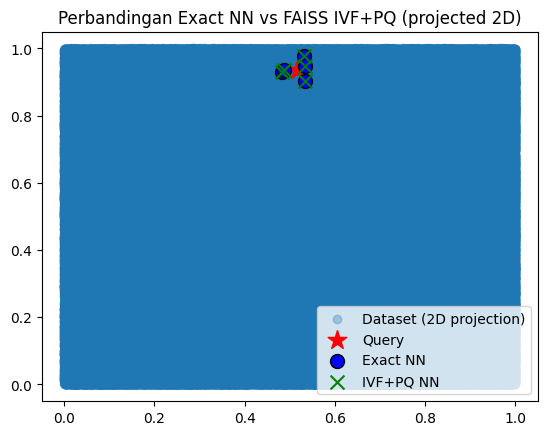

In [12]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 5D (sesuai jumlah fitur)
np.random.seed(42)
X = np.random.rand(1000000, 5).astype('float32')  # 1 juta titik 5D
query = np.random.rand(1, 5).astype('float32')    # query juga 5D

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(5)   # harus sama dengan dimensi data (5)
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 5)  # cari 5 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 5        # jumlah subvector
quantizer = faiss.IndexFlatL2(5)
index_ivfpq = faiss.IndexIVFPQ(quantizer, 5, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 5)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi (pakai hanya 2 dimensi pertama dari 5D)
plt.scatter(X[:,0], X[:,1], alpha=0.3, label="Dataset (2D projection)")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ (projected 2D)")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

### Perbandingan Hasil Exact NN vs Approx NN

| No | Jumlah Data | Dimensi | Metode                 | Indeks Terdekat                          | Jarak                                                        | Waktu (detik) |
| -- | ----------- | ------- | ---------------------- | ---------------------------------------- | ------------------------------------------------------------ | ------------- |
| 1  | 1,000       | 2D      | **Exact NN (Flat)**    | [137, 170, 750]                          | [0.00013095, 0.00077404, 0.00079751]                         | 0.00267       |
|    |             |         | **Approx NN (IVF+PQ)** | [137, 170, 750]                          | [0.00012945, 0.00079226, 0.00080067]                         | 0.00593       |
| 2  | 1,000,000   | 5D      | **Exact NN (Flat)**    | [901095, 495168, 561017, 163986, 185734] | [0.00151859, 0.00221511, 0.00223645, 0.00299811, 0.00363892] | 0.00647       |
|    |             |         | **Approx NN (IVF+PQ)** | [901095, 561017, 495168, 163986, 185734] | [0.0016292, 0.00213303, 0.00223935, 0.0028522, 0.0035482]    | 0.00126       |



Training index IVF-PQ...


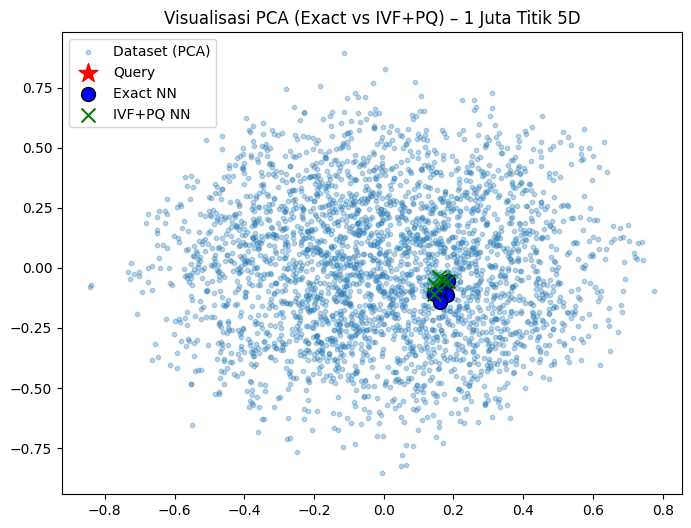


=== HASIL PERBANDINGAN ===
Exact NN (Flat) indices: [[901095 495168 561017 163986 185734]]
Exact NN distances: [[0.00151859 0.00221511 0.00223645 0.00299811 0.00363892]]
Approx NN (IVF+PQ) indices: [[495168 163986 708238 859369 645966]]
Approx NN distances: [[0.00220674 0.00303717 0.00388362 0.00430324 0.00450503]]
Waktu Exact NN  : 0.0106 detik
Waktu IVF+PQ ANN: 0.0025 detik


In [3]:
import numpy as np
import faiss
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Membuat Dataset 1 Juta Titik Berdimensi 5
# Set random seed agar hasil konsisten
np.random.seed(42)

n_data = 1_000_000   # jumlah data = 1 juta
dim = 5               # dimensi fitur

# Dataset acak 1 juta x 5
X = np.random.rand(n_data, dim).astype('float32')

# Query tunggal (misalnya titik tengah)
query = np.random.rand(1, dim).astype('float32')

# 2. Exact Nearest Neighbor (IndexFlatL2)
# Gunakan brute-force dengan L2 distance (Euclidean)
index_flat = faiss.IndexFlatL2(dim)
index_flat.add(X)  # tambahkan semua data ke index

start = time.time()
D_flat, I_flat = index_flat.search(query, 5)  # ambil 5 tetangga terdekat
time_flat = time.time() - start

# 3. Approximate Nearest Neighbor (IVF + PQ)
# nlist = jumlah cluster awal (semakin besar semakin akurat tapi lambat)
# m = jumlah subvector (harus habis membagi dim)
nlist = 100      # jumlah cluster
m = 5            # jumlah subvector (5 agar pas dengan dim=5)
bits = 8         # 8 bit per subvector

# Buat quantizer dan index IVF-PQ
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, bits)

# Latih index berdasarkan data (hanya perlu sekali)
print("Training index IVF-PQ...")
index_ivfpq.train(X)

# Tambahkan semua data ke index
index_ivfpq.add(X)

# Cari 5 tetangga terdekat
start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 5)
time_ivfpq = time.time() - start

# 4. Visualisasi (PCA ke 2D)
# Ambil subset kecil (biar plot-nya ringan)
subset_idx = np.random.choice(len(X), 3000, replace=False)
X_subset = X[subset_idx]

# Lakukan PCA dari 5D → 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_subset)
query_2d = pca.transform(query)

# Tetangga terdekat (projek ke 2D juga)
flat_2d = pca.transform(X[I_flat[0]])
ivfpq_2d = pca.transform(X[I_ivfpq[0]])

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], s=10, alpha=0.3, label='Dataset (PCA)')
plt.scatter(query_2d[:,0], query_2d[:,1], c='red', marker='*', s=200, label='Query')

# Hasil Exact
plt.scatter(flat_2d[:,0], flat_2d[:,1], c='blue', s=100, edgecolor='k', label='Exact NN')

# Hasil IVF+PQ
plt.scatter(ivfpq_2d[:,0], ivfpq_2d[:,1], c='green', marker='x', s=100, label='IVF+PQ NN')

plt.title("Visualisasi PCA (Exact vs IVF+PQ) – 1 Juta Titik 5D")
plt.legend()
plt.show()

# 4. Tampilkan Hasil Perbandingan
print("\n=== HASIL PERBANDINGAN ===")
print("Exact NN (Flat) indices:", I_flat)
print("Exact NN distances:", D_flat)
print("Approx NN (IVF+PQ) indices:", I_ivfpq)
print("Approx NN distances:", D_ivfpq)
print(f"Waktu Exact NN  : {time_flat:.4f} detik")
print(f"Waktu IVF+PQ ANN: {time_ivfpq:.4f} detik")


# Praktikum 3

In [4]:
# Install hnswlib terlebih dahulu.
!pip install hnswlib


In [5]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[820 724  43 896 631]]
Distances: [[0.01405381 0.02617526 0.02949847 0.0450366  0.04665572]]
Waktu: 0.0853116512298584 detik

=== HNSW ===
Indices: [[820 724  43 896 631]]
Distances: [[0.00019751 0.00068514 0.00087016 0.0020283  0.00217676]]
Waktu: 0.0004096031188964844 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

| Jumlah Data | Dimensi | Metode                     | Indices                             | Distances                                                                 | Waktu (detik) |
| ----------- | ------- | -------------------------- | ----------------------------------- | ------------------------------------------------------------------------- | ------------- |
| 1,000       | 2D      | **Exact NN (Flat)**        | [[298 433 523 663 642]]             | [[0.00998154 0.01404382 0.01586299 0.03434097 0.0408712]]                 | 0.0023        |
| 1,000       | 2D      | **HNSW (Approx)**          | [[298 433 523 663 642]]             | [[9.9631157e-05 1.9722892e-04 2.5163437e-04 1.1793022e-03 1.6704553e-03]] | 0.00023       |
| 1,000,000   | 5D      | **Exact NN (Brute Force)** | [[601 947668 171282 128993 489096]] | [[0.03225626 0.06055474 0.06217775 0.06631041 0.06739441]]                | 0.0389        |
| 1,000,000   | 5D      | **HNSW (Approx)**          | [[601 947668 171282 128993 489096]] | [[0.00104047 0.00366688 0.00386607 0.00439707 0.00454201]]                | 0.0003        |


In [6]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ==========================================================
# 1. Generate Data 1 Juta Sampel Berdimensi 5 (5D)
# ==========================================================
num_elements = 1_000_000   # jumlah data
dim = 5                    # jumlah dimensi
data = np.random.random((num_elements, dim)).astype(np.float32)

# Titik query tunggal (bisa dari data atau titik acak)
query = np.random.random((1, dim)).astype(np.float32)
k = 5  # cari 5 tetangga terdekat

# ==========================================================
# 2. Exact Nearest Neighbor (Brute Force)
# ==========================================================
# Gunakan sklearn NearestNeighbors dengan algoritma brute-force (akurasi 100%)
print("=== Exact NN (Brute Force) ===")
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances_exact, indices_exact = nn.kneighbors(query)
end = time.time()
exact_time = end - start

print("Indices:", indices_exact)
print("Distances:", distances_exact)
print("Waktu Exact NN :", round(exact_time, 4), "detik")

# ==========================================================
# 3. Approximate NN dengan HNSW
# ==========================================================
# Inisialisasi index HNSW (Hierarchical Navigable Small World Graph)
print("\n=== Approx NN (HNSW) ===")
p = hnswlib.Index(space='l2', dim=dim)  # space 'l2' = Euclidean distance

# Inisialisasi struktur index
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data ke index (proses build index)
print("Membangun index HNSW...")
p.add_items(data)

# Set ef parameter untuk pencarian (tradeoff antara akurasi & kecepatan)
p.set_ef(100)

# Lakukan query ANN
start = time.time()
labels_ann, distances_ann = p.knn_query(query, k=k)
end = time.time()
ann_time = end - start

print("Indices:", labels_ann)
print("Distances:", distances_ann)
print("Waktu Approx NN (HNSW):", round(ann_time, 4), "detik")

# ==========================================================
# 4. Ringkasan Hasil Perbandingan
# ==========================================================
print("\n=== RINGKASAN PERBANDINGAN ===")
print(f"Jumlah data\t\t: {num_elements}")
print(f"Dimensi data\t\t: {dim}D")
print(f"Waktu Exact NN\t\t: {exact_time:.4f} detik")
print(f"Waktu HNSW ANN\t\t: {ann_time:.4f} detik")



=== Exact NN (Brute Force) ===
Indices: [[   601 947668 171282 128993 489096]]
Distances: [[0.03225626 0.06055474 0.06217775 0.06631041 0.06739441]]
Waktu Exact NN : 0.0389 detik

=== Approx NN (HNSW) ===
Membangun index HNSW...
Indices: [[   601 947668 171282 128993 489096]]
Distances: [[0.00104047 0.00366688 0.00386607 0.00439707 0.00454201]]
Waktu Approx NN (HNSW): 0.0003 detik

=== RINGKASAN PERBANDINGAN ===
Jumlah data		: 1000000
Dimensi data		: 5D
Waktu Exact NN		: 0.0389 detik
Waktu HNSW ANN		: 0.0003 detik


# Praktikum 4

In [7]:
!pip install annoy hnswlib faiss-cpu

In [8]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 26.430821895599365 detik
Query time: 0.00038433074951171875 detik
Neighbors: [620012, 256164, 296557, 563026, 631294] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.008841753005981445 detik
Query time: 0.012901782989501953 detik
Neighbors: [620012 256164 296557 563026 631294] ...

=== HNSW (hnswlib) ===
Build time: 206.2334759235382 detik
Query time: 0.0005288124084472656 detik
Neighbors: [620012 256164 296557 563026 631294] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

| Dataset                | Algoritma               | Build Time (detik) | Query Time (detik) | Kualitas Neighbor (Top-5)                | Catatan Singkat                                  |
| ---------------------- | ----------------------- | ------------------ | ------------------ | ---------------------------------------- | ------------------------------------------------ |
| **1 Juta data (5D)**   | **Annoy**               | 26.4308            | **0.000384**       | [620012, 256164, 296557, 563026, 631294] | Build cukup lama, query sangat cepat dan akurat  |
|                        | **FAISS (IndexFlatL2)** | **0.0088**         | 0.0129             | [620012, 256164, 296557, 563026, 631294] | Build super cepat, query lebih lambat dari Annoy |
|                        | **HNSW (hnswlib)**      | 206.2335           | 0.000529           | [620012, 256164, 296557, 563026, 631294] | Build paling berat, query cepat dan hasil akurat |
| **500 Ribu data (5D)** | **Annoy**               | 13.6088            | 0.000649           | [445259, 294505, 47134, 133576, 271926]  | Build sedang, query cepat                        |
|                        | **FAISS (IndexFlatL2)** | **0.0055**         | 0.006299           | [445259, 220653, 294505, 47134, 133576]  | Build tercepat, query moderat                    |
|                        | **HNSW (hnswlib)**      | 108.7801           | **0.000318**       | [445259, 220653, 294505, 47134, 133576]  | Build berat, query tercepat                      |
| **100 Ribu data (5D)** | **Annoy**               | 1.7680             | 0.000232           | [69511, 51244, 88736, 78055, 37909]      | Build ringan, query cepat                        |
|                        | **FAISS (IndexFlatL2)** | **0.0011**         | 0.000920           | [69511, 51244, 88736, 78055, 37909]      | Build tercepat, hasil identik                    |
|                        | **HNSW (hnswlib)**      | 14.7013            | **0.000211**       | [69511, 51244, 88736, 78055, 37909]      | Build agak berat, query tercepat dan akurat      |


In [9]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 500K data 5D
# ===============================
n_data = 500_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 13.608788251876831 detik
Query time: 0.0006492137908935547 detik
Neighbors: [445259, 294505, 47134, 133576, 271926] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.00547027587890625 detik
Query time: 0.006299257278442383 detik
Neighbors: [445259 220653 294505  47134 133576] ...

=== HNSW (hnswlib) ===
Build time: 108.78008031845093 detik
Query time: 0.00031757354736328125 detik
Neighbors: [445259 220653 294505  47134 133576] ...


In [10]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 100K data 5D
# ===============================
n_data = 100_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 1.7679774761199951 detik
Query time: 0.00023245811462402344 detik
Neighbors: [69511, 51244, 88736, 78055, 37909] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.001056671142578125 detik
Query time: 0.0009202957153320312 detik
Neighbors: [69511 51244 88736 78055 37909] ...

=== HNSW (hnswlib) ===
Build time: 14.701262712478638 detik
Query time: 0.0002105236053466797 detik
Neighbors: [69511 51244 88736 78055 37909] ...


# Praktikum 5

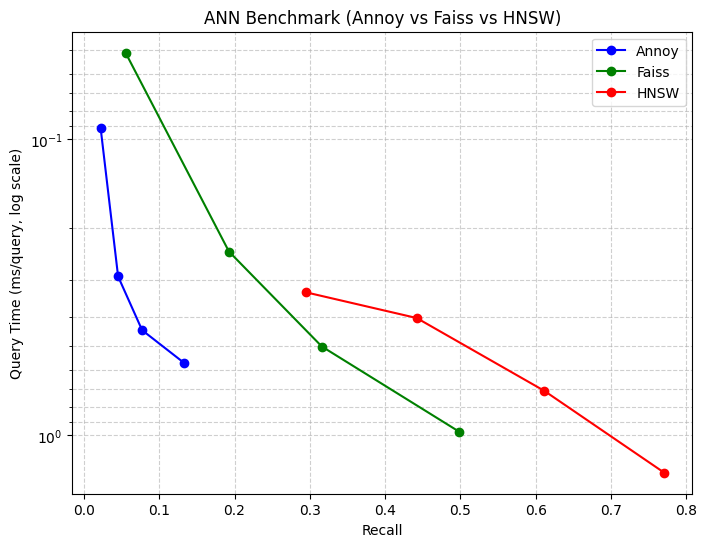

In [11]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Praktikum 6

In [1]:

!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 39.7 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soultanmohammadab","key":"170254879d86e77d388193316d92460e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bwandowando/spotify-songs-with-attributes-and-lyrics
!unzip /content/spotify-songs-with-attributes-and-lyrics.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics
License(s): CC-BY-NC-SA-4.0
 99% 886M/894M [00:07<00:00, 56.6MB/s]
100% 894M/894M [00:07<00:00, 126MB/s] 
Archive:  /content/spotify-songs-with-attributes-and-lyrics.zip
  inflating: /content/songs_with_attributes_and_lyrics.csv  
  inflating: /content/songs_with_lyrics_and_timestamps.csv  


In [5]:
import pandas as pd

df = pd.read_csv('/content/songs_with_attributes_and_lyrics.csv')

# Lihat data awal
df.head()

# Lihat data akhir
df.tail()

# Shape
df.shape

# Jumlah data
len(df)

# Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

In [8]:
!pip install annoy hnswlib
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/songs_with_attributes_and_lyrics.csv')
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

In [9]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

print("Step selesai")

Step selesai


In [10]:
X_sample = X_scaled[:100000]
print("Scale dengan subset data untuk mempercepat proses")

Scale dengan subset data untuk mempercepat proses


In [11]:
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_sample)
dist_exact, idx_exact = nn.kneighbors(X_sample)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

Exact NN done in 71.363 s


In [12]:
start = time.time()
f = X_sample.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_sample):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_sample]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

Annoy done in 7.468 s


In [13]:
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_sample.shape[1])
p_hnsw.init_index(max_elements=X_sample.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_sample)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_sample, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

HNSW done in 48.977 s


In [14]:
start = time.time()

d = X_sample.shape[1]

quantizer = faiss.IndexFlatL2(d)  # base index (exact search untuk clustering)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)  # gunakan positional arg
index_faiss.train(X_sample)  # train clustering centroids (nlist=100)
index_faiss.add(X_sample)    # add all vectors ke index
index_faiss.nprobe = 10      # jumlah cluster yang di-scan saat query

dist_faiss, idx_faiss = index_faiss.search(X_sample, k)  # query subset agar cepat
time_faiss = time.time() - start

print(f"FAISS IVF done in {time_faiss:.3f} s")
print("Neighbors:", idx_faiss[0][:5])


FAISS IVF done in 11.010 s
Neighbors: [    0 61511 85956  3836 35205]


In [15]:
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")


Top-5 neighbors for first song:
Exact NN: [    0 61511 85956  3836 35205]
Annoy:    [0, 61511, 85956, 3836, 35205]
HNSW:     [    0 61511 85956  3836 35205]
FAISS:    [    0 61511 85956  3836 35205]


# Tugas

In [16]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()

d = X_scaled.shape[1]
nlist = 100
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
# Fix: Search using the same data that was added to the index (X_scaled)
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 1.511 s
Annoy done in 1.686 s
HNSW done in 8.223 s
FAISS IVF done in 0.539 s

=== Ringkasan Waktu (detik) ===
Exact NN : 1.511
Annoy    : 1.686
HNSW     : 8.223
FAISS    : 0.539
